In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

merged_df = pd.read_csv('../Data/realtor/realtor_zip_monthly_historical.csv')

# show head
merged_df.head()


/var/folders/sp/_mjrzq3j7cx5cnmtdrl_njsr0000gn/T/ipykernel_98778/2523539624.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv('../Data/realtor/realtor_zip_monthly_historical.csv')


,month_date_yyyymm,postal_code,zip_name,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
0,202408,32343.0,"midway, fl",304950.0,0.0168,-0.1028,14.0,-0.2632,-0.1250,74.0,...,316505.0,0.0254,-0.0129,20.0,0.0526,0.2500,0.3571,0.3045,NaN,1.0
1,202408,62896.0,"west frankfort, il",125000.0,0.3999,0.6955,29.0,0.0943,-0.0333,62.0,...,128365.0,0.1748,0.4221,47.0,-0.0309,-0.0874,0.6552,-0.1939,-0.0615,1.0
2,202408,56477.0,"sebeka, mn",302400.0,-0.1186,-0.1919,13.0,0.6250,-0.1875,51.0,...,290570.0,0.0048,-0.1862,17.0,0.7000,-0.1500,0.4615,0.2115,0.2115,1.0
3,202408,25315.0,"charleston, wv",65000.0,-0.1613,0.1017,5.0,0.2500,-0.2308,36.0,...,100600.0,0.1795,0.7891,6.0,-0.2941,-0.3333,0.4000,-0.8500,0.0154,0.0
4,202408,76454.0,"gorman, tx",184500.0,-0.0027,0.1535,3.0,-0.5000,-0.4545,46.0,...,489750.0,0.3737,0.0619,8.0,-0.0588,-0.0588,1.3333,0.8333,0.7879,1.0


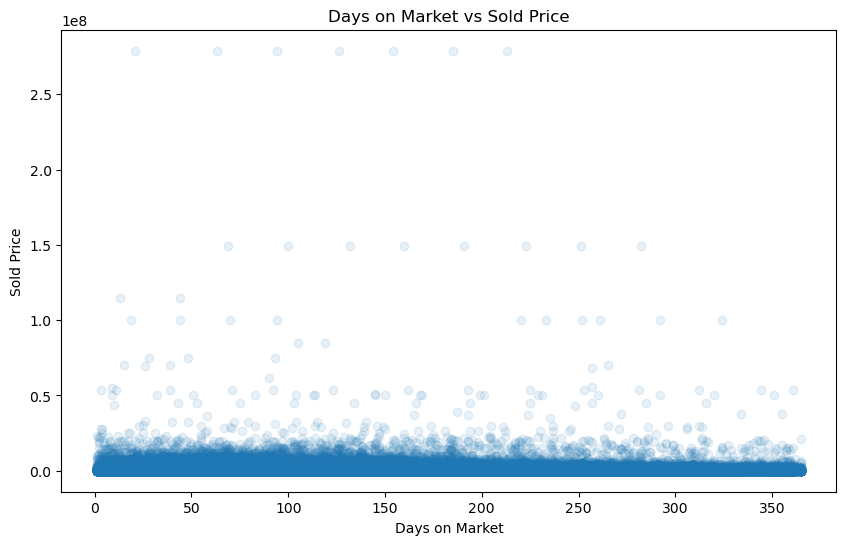

In [5]:
# graph the days on the market on the x axis and the sold price on the y axis, with a trend line
plt.figure(figsize=(10, 6))
sns.regplot(x='median_days_on_market', y='median_listing_price', data=merged_df, scatter_kws={'alpha': 0.1})
plt.title('Days on Market vs Sold Price')
plt.xlabel('Days on Market')
plt.ylabel('Sold Price')
plt.show()


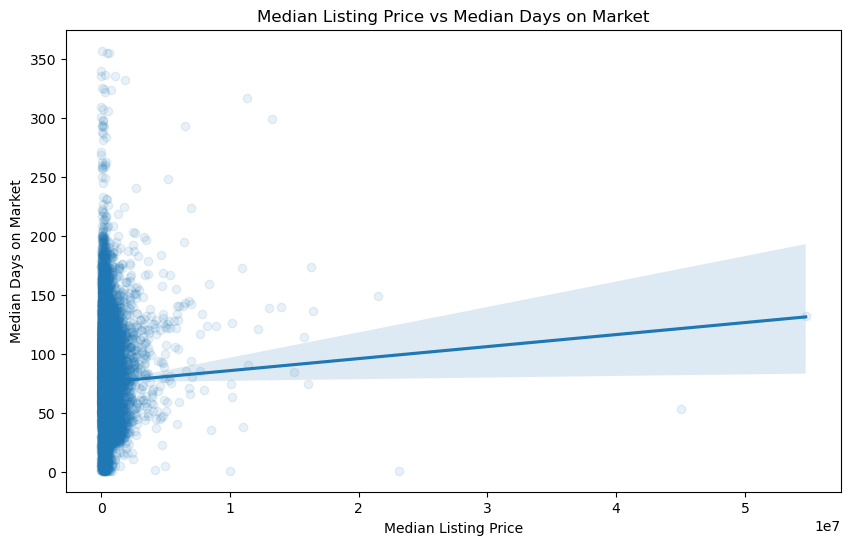

0.02180018849787043
0.02180018849787043


In [6]:
# see if there is a relationship between the median listing price and the median days on market if we aggregate by zip code
merged_df_agg = merged_df.groupby('postal_code').agg({'median_listing_price': 'mean', 'median_days_on_market': 'mean'}).reset_index()

# graph the median listing price on the x axis and the median sold price on the y axis, with a trend line
plt.figure(figsize=(10, 6))
sns.regplot(x='median_listing_price', y='median_days_on_market', data=merged_df_agg, scatter_kws={'alpha': 0.1})
plt.title('Median Listing Price vs Median Days on Market')
plt.xlabel('Median Listing Price')
plt.ylabel('Median Days on Market')
plt.show()

# print the correlation between the median listing price and the median days on market
print(merged_df_agg['median_listing_price'].corr(merged_df_agg['median_days_on_market']))

# for a 100k increase in median listing price, how much does the median days on market increa
print(merged_df_agg['median_days_on_market'].corr(merged_df_agg['median_listing_price']))



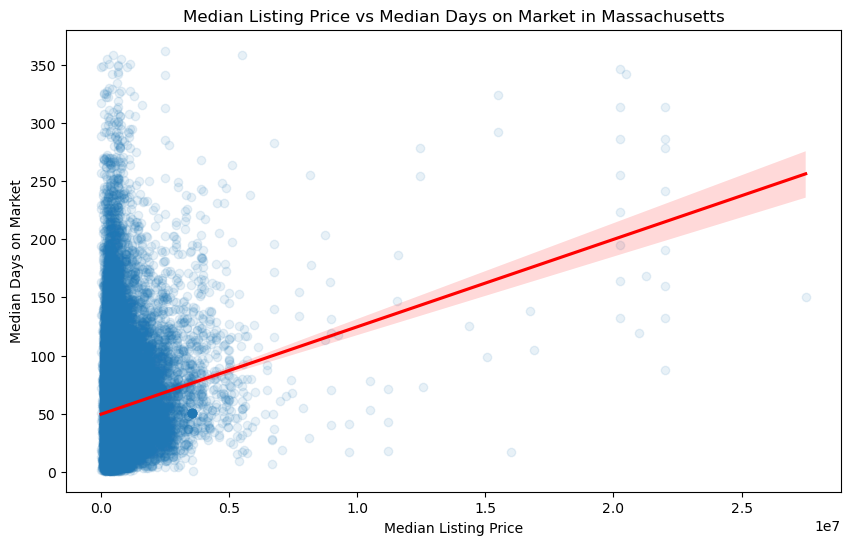

In [7]:
# same as above but for just zip codes in Massachusetts
# to get mass zips, we want all rows where zip_name ends with ma, not including 
mass_zips = merged_df[merged_df['zip_name'].str.endswith('ma', na=False)]

# graph the median listing price on the x axis and the median days on market on the y axis, with a trend line and slope of the trend line

# also the x axis show be in 100k increments
plt.figure(figsize=(10, 6))
sns.regplot(x='median_listing_price', y='median_days_on_market', data=mass_zips, scatter_kws={'alpha': 0.1}, line_kws={'color': 'red'})
plt.title('Median Listing Price vs Median Days on Market in Massachusetts')
plt.xlabel('Median Listing Price')
plt.ylabel('Median Days on Market')

plt.show()


In [8]:
# get the correlation between the median listing price and the median days on market in Massachusetts
print(mass_zips['median_listing_price'].corr(mass_zips['median_days_on_market']))

0.14421496266553752


/Users/bermo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


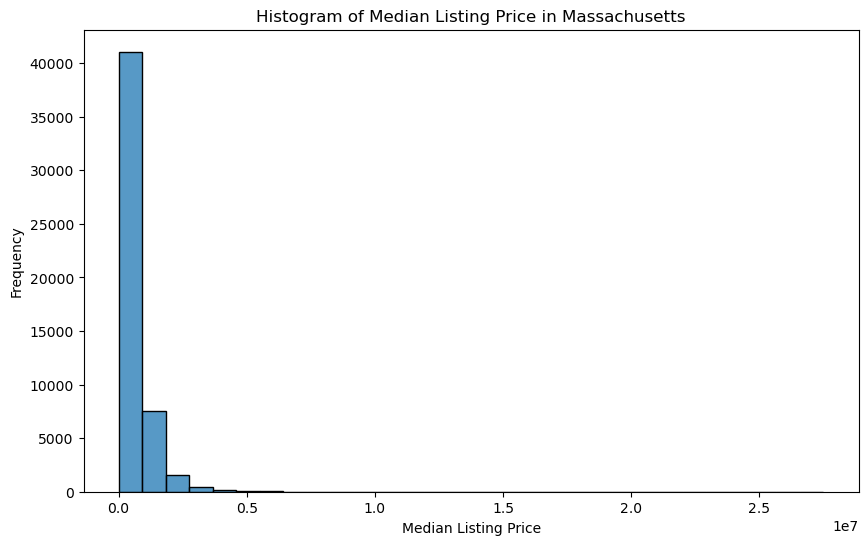

/Users/bermo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


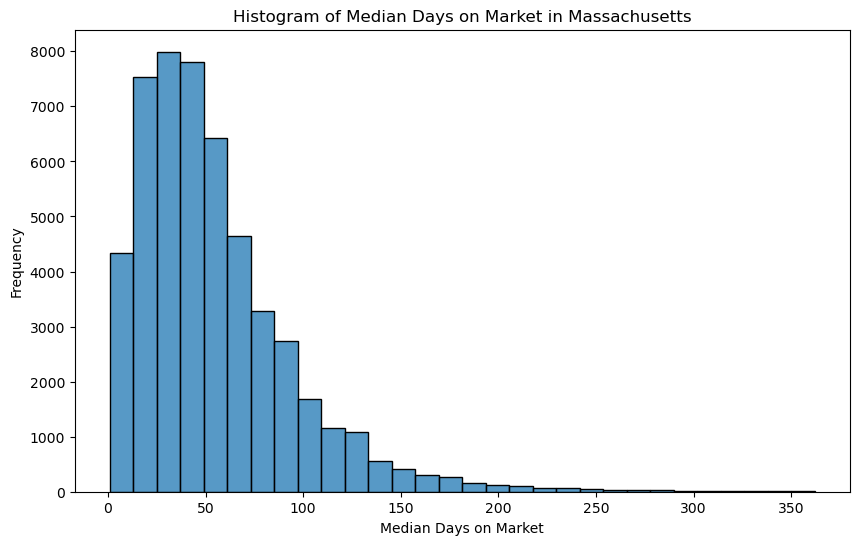

In [9]:
# show histogram of median listing price in Massachusetts
plt.figure(figsize=(10, 6))
sns.histplot(mass_zips['median_listing_price'], bins=30)
plt.title('Histogram of Median Listing Price in Massachusetts')
plt.xlabel('Median Listing Price')
plt.ylabel('Frequency')
plt.show()

# show histogram of median days on market in Massachusetts
plt.figure(figsize=(10, 6))
sns.histplot(mass_zips['median_days_on_market'], bins=30)
plt.title('Histogram of Median Days on Market in Massachusetts')
plt.xlabel('Median Days on Market')
plt.ylabel('Frequency')
plt.show()


In [10]:
# get slope of the trend line
# Remove any rows with NaN values in the columns used for polyfit

# show shape before cleaning
print(mass_zips.shape)

cleaned_mass_zips = mass_zips.dropna(subset=['median_listing_price', 'median_days_on_market'])

# print the shape of the cleaned dataframe
print(cleaned_mass_zips.shape)

# Ensure there are enough data points to perform polyfit
linear_regression = np.polyfit(cleaned_mass_zips['median_listing_price'], cleaned_mass_zips['median_days_on_market'], 1)
print(f'Linear regression: {linear_regression}')

# considering the slope of the trend line, how much does the median days on market increase for a 100k increase in median listing price?
print(f'For a 100k increase in median listing price, the median days on market increases by {linear_regression[0] * 100000:.5f} days')

(51044, 40)
(50949, 40)
Linear regression: [7.51517956e-06 4.95329046e+01]
For a 100k increase in median listing price, the median days on market increases by 0.75152 days


In [11]:
# same as above but for zip codes in massachusetts from 2020 onwards. The month_date_yyyymm column should start with 2020 or 2021 or 2022 or 2023 or 2024
mass_zips = merged_df[merged_df['zip_name'].str.endswith('ma', na=False)] 
# remove any rows where the month_date_yyyymm column is NaN
mass_zips = mass_zips.dropna(subset=['month_date_yyyymm'])
# Convert month_date_yyyymm to string to avoid issues with NaN values
mass_zips['month_date_yyyymm'] = mass_zips['month_date_yyyymm'].astype(str)
# recent_mass_zips should be the rows where the month_date_yyyymm column starts with 2020 or 2021 or 2022 or 2023 or 2024
recent_mass_zips = mass_zips[mass_zips['month_date_yyyymm'].str.startswith(('2020', '2021','2022', '2023', '2024'))]

# show shape of the new dataframe
print(recent_mass_zips.shape)

(28998, 40)


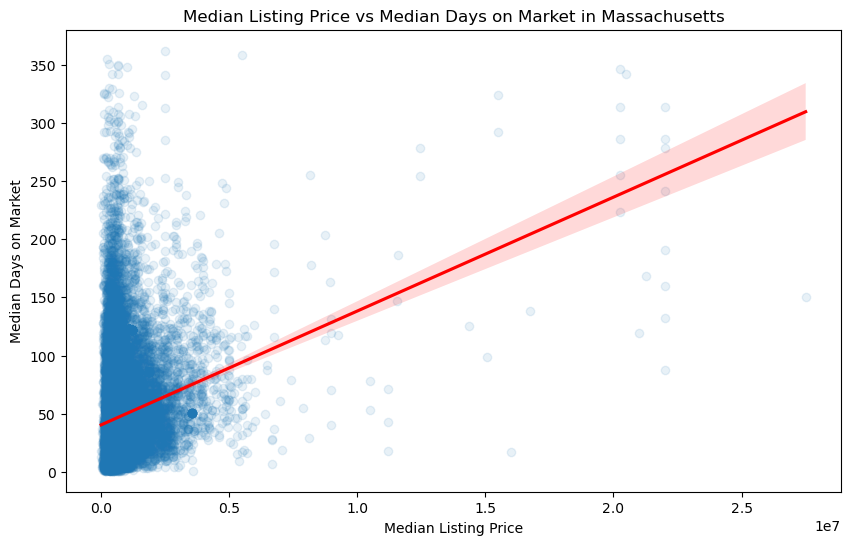

In [12]:
# graph the median listing price on the x axis and the median days on market on the y axis, with a trend line and slope of the trend line
plt.figure(figsize=(10, 6))
sns.regplot(x='median_listing_price', y='median_days_on_market', data=recent_mass_zips, scatter_kws={'alpha': 0.1}, line_kws={'color': 'red'})
plt.title('Median Listing Price vs Median Days on Market in Massachusetts')
plt.xlabel('Median Listing Price')
plt.ylabel('Median Days on Market')
plt.show()

In [21]:
# print the correlation between the median listing price and the median days on market in Massachusetts
print(recent_mass_zips['median_listing_price'].corr(recent_mass_zips['median_days_on_market']))

# get the slope of the trend line, clean first
cleaned_recent_mass_zips = recent_mass_zips.dropna(subset=['median_listing_price', 'median_days_on_market'])
linear_regression = np.polyfit(cleaned_recent_mass_zips['median_listing_price'], cleaned_recent_mass_zips['median_days_on_market'], 1)
print(f'Linear regression: {linear_regression}')

# considering the slope of the trend line, how much does the median days on market increase for a 100k increase in median listing price?
# make the slope a high precision number and not rounded
print(f'For a 1 dollar increase in median listing price, the median days on market increases by {linear_regression[0]*10:.6f} days')
print(f'For a 100k increase in median listing price, the median days on market increases by {linear_regression[0] * 1000000:.6f} days')

price_slope = linear_regression[0] * 100000



0.2147190487889735
Linear regression: [9.79107327e-06 4.03067704e+01]
For a 1 dollar increase in median listing price, the median days on market increases by 0.000098 days
For a 100k increase in median listing price, the median days on market increases by 9.791073 days


In [14]:
# pull in the min_max_price_per_zip_cluster.json file and save it as a dataframe
min_max_price_per_zip_cluster = pd.read_json('../Data/baseline_model/min_max_price_per_zip_cluster.json')

# show the head of the dataframe
min_max_price_per_zip_cluster.head()

,zip_cluster,min,max
0,1420,43000.0,350000.0
1,1432,117000.0,405000.0
2,1450,110000.0,740933.0
3,1451,135000.0,490000.0
4,1453,43000.0,254900.0


In [25]:
import numpy as np

# Constants for demonstration
scaling_factor = 100
dom_baseline = 30  # Baseline days on market at midpoint price
MAX_DOM = 1000      # Cap on maximum days on market
MIN_DOM = 1        # Minimum days on market for extreme low price

def dom_effects_for_zip_cluster(zip_cluster, scaling_factor, dom_baseline):
    # Get the midpoint price and define the price range
    min_price = min_max_price_per_zip_cluster[min_max_price_per_zip_cluster['zip_cluster'] == zip_cluster]['min'].iloc[0]
    max_price = min_max_price_per_zip_cluster[min_max_price_per_zip_cluster['zip_cluster'] == zip_cluster]['max'].iloc[0]
    midpoint_price = (min_price + max_price) / 2

    # Generate price options across the slider
    price_options = np.linspace(min_price, max_price, 10)

    dom_effects = []
    for price in price_options:
        # Calculate the distance from the midpoint as a proportion
        price_diff = price - midpoint_price
        proportion = price_diff / midpoint_price
        
        # Apply a nonlinear scaling where further deviations have greater impact
        dom_adjustment = scaling_factor * (proportion**2) * np.sign(proportion)
        
        # Adjust DOM based on baseline and calculated adjustment
        dom_effect = dom_baseline + dom_adjustment
        
        # Ensure DOM remains within reasonable bounds
        dom_effect = max(min(dom_effect, MAX_DOM), MIN_DOM)
        
        dom_effects.append(dom_effect)
    
    return price_options, dom_effects

# Example usage
price_options, dom_effects = dom_effects_for_zip_cluster(1420, scaling_factor, dom_baseline)  # Adjust scaling factor as needed

# Print the results
for price, dom in zip(price_options, dom_effects):
    print(f"Price: ${price:.2f}, DOM Prediction: {dom:.2f} days")

Price: $43000.00, DOM Prediction: 1.00 days
Price: $77111.11, DOM Prediction: 1.00 days
Price: $111222.22, DOM Prediction: 11.17 days
Price: $145333.33, DOM Prediction: 23.22 days
Price: $179444.44, DOM Prediction: 29.25 days
Price: $213555.56, DOM Prediction: 30.75 days
Price: $247666.67, DOM Prediction: 36.78 days
Price: $281777.78, DOM Prediction: 48.83 days
Price: $315888.89, DOM Prediction: 66.91 days
Price: $350000.00, DOM Prediction: 91.02 days


In [33]:
# make a csv of the tick marks and the respective dom adjustment (not the DOM, but how much we add or subtract from the baseline). One csv total
# keep a zip_cluster column in the dataframe
# replace the price column with just a tick column that goes from 0 to 10
dom_adjustments = []
for zip_cluster in min_max_price_per_zip_cluster['zip_cluster'].unique():
    price_options, dom_effects = dom_effects_for_zip_cluster(zip_cluster, scaling_factor, dom_baseline)
    price_dom_effects = pd.DataFrame({'tick': np.arange(0, 10), 'dom_adjustment': dom_effects, 'zip_cluster': zip_cluster})
    dom_adjustments.append(price_dom_effects)

# concatenate all the dataframes in the list
dom_adjustments = pd.concat(dom_adjustments)

# save the concatenated dataframe to a csv
dom_adjustments.to_csv('../Data/baseline_model/price_dom_effects.csv', index=False)